**Anand Chuahan**
</br>
**Coding Assignment**
</br>
Mathematical Foundation of Data Science

Consider a data matrix $X_{n×k}$. Either you need to simulate it or use some
real life datafile from internet. Your dataset should have numerical variables
only. Write down a program for k-means cluster analysis algorithm. Set a
threshold to stop if convergence is not achieved. Your program should have
the option to specify k (number of clusters) as parameter. Report summary
statistics (number of observations, mean and variance) for each cluster

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data_science/Iris.csv",header = None)
data.head()

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [ ]:
data = data.iloc[:,1:5]
data = data.iloc[1:,]


In [ ]:
data = data.values.tolist()

In [ ]:
#converting each of the data elements into float
for i in range(len(data)):
    data[i] = [float(value) for value in data[i]]

In [ ]:
import random as rand
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#function to assign the datapoints to itss closest centroids
def cluster(data,C):
  asg = []  #store the cluster assignment for each of the data points

  for x in data:
    dist_ech_cluster = [] #store dist bw the current datapoint and each of the cluster(centroids)

    for cent in C:
      #clc and store the eucledian dist bw the current data point and current cluster
      dist_clust = np.linalg.norm(np.array(x)-np.array(cent))
      dist_ech_cluster.append(dist_clust)

    #now finding the min distance of the cluster center from the data point and store to asg
    min_cent_dist = np.argmin(dist_ech_cluster)
    asg.append(min_cent_dist)

  return asg


In [ ]:
#function to calculate the new centroid
def new_cent(data, C, cluster_asg, k):
  new_cent = []   #it will store the new cluster centers

  for i in range(k):
    clust_curr =[]    #store the datapoints belong to the current cluster with index i

    for x in range(len(data)):
      if cluster_asg[x] == i:           #if assignment of the current data point==current cluster index
        clust_curr.append(data[x])      #stores all the data points belonging to the current clust

    mean_clust = np.mean(clust_curr, axis = 0)    #taking the mean
    new_cent.append(mean_clust)                   #appended to new_cent as new centroids

  return new_cent




In [ ]:
#function to calculate the sum of squared error
def SSE(data, cluster_asg, C):
  sq_error = []       #store the squared_error

  for i in range(len(data)):
    c = C[cluster_asg[i]]           #stores the centroid assigned to the current data point

    error = np.linalg.norm(np.array(data[i])-np.array(c))  #calc the dist bw the current datapoint and its assigned centroid
    sq_error.append(error**2)      #squaring and append in sq_error list

  sse = sum(sq_error)

  return sse


In [ ]:
def cluster_statistics(data, cluster_asg, k):
    cluster_stats = []

    for i in range(k):
        data_in_cluster = [data[j] for j in range(len(data)) if cluster_asg[j] == i]  # store data points belong to the current cluster with index i
        num_observations = len(data_in_cluster)   #nos of observation in currenct clustr

        if num_observations > 0:
            mean_cluster = [sum(x) / num_observations for x in zip(*data_in_cluster)]      #calc the mean across all the dim
            variance_cluster = [sum((x[i] - mean_cluster[i]) ** 2 for x in data_in_cluster) / num_observations for i in range(len(mean_cluster))]   #calc the variance across all the data points
        else:
            mean_cluster = [0] * len(data[0])
            variance_cluster = [0] * len(data[0])
        #storing all the values
        cluster_stats.append({
            'mean': mean_cluster,
            'variance': variance_cluster,
            'num_observations': num_observations
        })

    return cluster_stats

In [ ]:
def k_means_cluster(data, k,):

  tlrnc = pow(10,-3)    #tolrence level
  max_itr = 100         #max iterations
  current_itr = -1      #keep track of current iterations
  error_sse = []        #store sum of square error at each iteration
  cluster_asg = []      #store the cluster assignment for each of the data points

  #assigning centroid randomly
  C=[]
  for i in range(k):
    rand_c = data[rand.randint(0,149)]
    C.append(rand_c)


  while(len(error_sse) <= 1 or   # atleast loop runs for one time
        (current_itr < max_itr   #check that the current itr is less than the max itr and successive SSE is under or equal to tolrence
         and
         np.absolute(error_sse[current_itr]- error_sse[current_itr -1])/error_sse[current_itr-1] >= tlrnc)):

         current_itr = current_itr + 1

         #assigning data points to the nearest cluster center
         cluster_asg = cluster(data, C )

         #calc the new centroids
         C = new_cent(data, C, cluster_asg, k)

         #calculating the sum of squared error
         sse = SSE(data, cluster_asg, C)
         error_sse.append(sse)

         cls=cluster_statistics(data, cluster_asg, k)

  return(cluster_asg, C, error_sse, current_itr,cls)




**Here you can specify the number of cluster**
</br>
*just change the value of k*

In [ ]:
# k = input("enter the k(number of cluster) value : ")
result = k_means_cluster(data, k=3)

In [ ]:
result[1:]

([array([6.85384615, 3.07692308, 5.71538462, 2.05384615]),
  array([5.88360656, 2.74098361, 4.38852459, 1.43442623]),
  array([5.006, 3.418, 1.464, 0.244])],
 [115.88021060606059,
  91.87466195426192,
  86.11593143374044,
  84.47725971685972,
  83.60550954940061,
  82.37141449275363,
  81.36719999999997,
  80.31574621578093,
  79.68172190942474,
  79.1155666666667,
  78.94506582597724,
  78.94506582597724],
 11,
 [{'mean': [6.853846153846153,
    3.0769230769230766,
    5.715384615384615,
    2.053846153846153],
   'variance': [0.23222879684418146,
    0.08023668639053251,
    0.25360946745562135,
    0.0855621301775148],
   'num_observations': 39},
  {'mean': [5.88360655737705,
    2.740983606557377,
    4.388524590163935,
    1.4344262295081966],
   'variance': [0.1974361730717547,
    0.08438591776404195,
    0.25740929857565176,
    0.08848696586938995],
   'num_observations': 61},
  {'mean': [5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999],
   'variance': [0.1217

In [ ]:
# cluster statistics
# mean, variance, and num_observations
result[4]

[{'mean': [6.853846153846153,
   3.0769230769230766,
   5.715384615384615,
   2.053846153846153],
  'variance': [0.23222879684418146,
   0.08023668639053251,
   0.25360946745562135,
   0.0855621301775148],
  'num_observations': 39},
 {'mean': [5.88360655737705,
   2.740983606557377,
   4.388524590163935,
   1.4344262295081966],
  'variance': [0.1974361730717547,
   0.08438591776404195,
   0.25740929857565176,
   0.08848696586938995],
  'num_observations': 61},
 {'mean': [5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999],
  'variance': [0.12176399999999993,
   0.142276,
   0.02950400000000001,
   0.011263999999999996],
  'num_observations': 50}]

In [ ]:
temp_data = pd.read_csv("/content/drive/MyDrive/Data_science/Iris.csv")


In [ ]:
centroid_x=[]
for i in range(len(result[1])):
  centroid_x.append(result[1][i][0])

centroid_y=[]
for x in range(len(result[1])):
  centroid_y.append(result[1][x][2])


print(centroid_x)
print(centroid_y)

[6.853846153846153, 5.88360655737705, 5.005999999999999]
[5.715384615384615, 4.388524590163935, 1.464]


In [ ]:
temp_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x = temp_data['SepalLengthCm']
y = temp_data['PetalLengthCm']
asg = result[0]

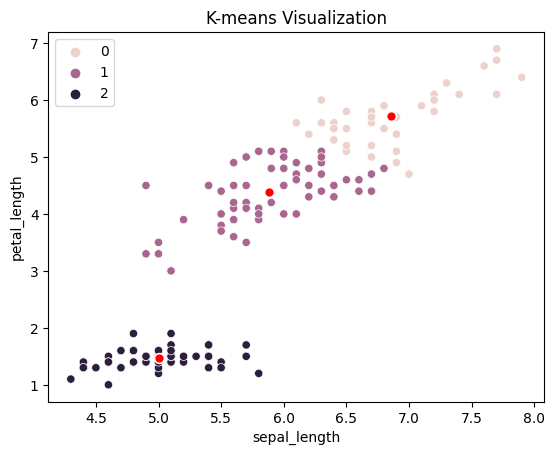

In [ ]:
# Create a scatter plot using Seaborn
sns.scatterplot(x= x, y= y, hue=asg)

custom_palette = sns.color_palette("Set3", n_colors=len(set(asg)))

# Plot centroids using Seaborn
sns.scatterplot(x= centroid_x, y=centroid_y, color='red', marker='.', s=200)

plt.title("K-means Visualization")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()